<a href="https://colab.research.google.com/github/benasphy/SVM/blob/main/SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Prediction for new sample: [0]


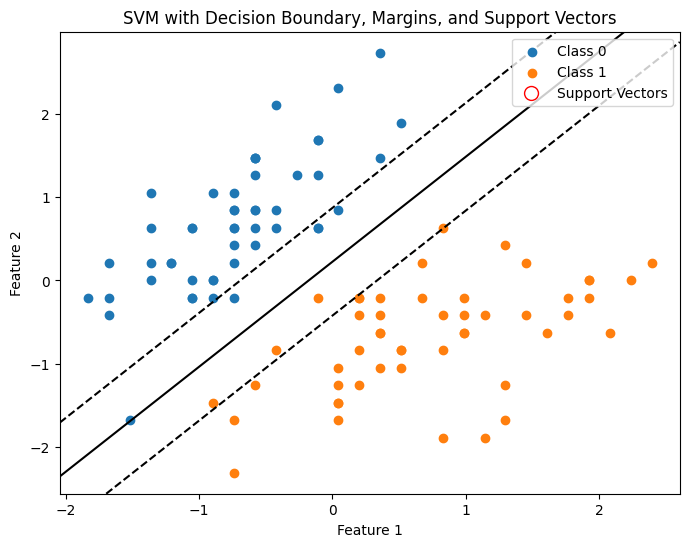

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Define SVM Classifier
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.y_ = np.where(y <= 0, -1, 1)  # Save for margin calc
        self.X_ = X                        # Save for margin calc
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = self.y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    dw = self.lambda_param * self.w
                    db = 0
                else:
                    dw = self.lambda_param * self.w - np.dot(x_i, self.y_[idx])
                    db = self.y_[idx]

                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.where(linear_output >= 0, 1, 0)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def get_support_vectors(self):
        margins = self.y_ * (np.dot(self.X_, self.w) - self.b)
        mask = np.isclose(margins, 1, atol=1e-2)
        return self.X_[mask]

# 2. Load and Prepare Data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # Only Setosa and Versicolor with 2 features
y = iris.target[:100]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train and Predict
svm = SVM()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print("Accuracy:", svm.accuracy(y_test, predictions))

# 4. Predict a New Example
new_sample = scaler.transform([[5.1, 3.5]])
pred_class = svm.predict(new_sample)
print("Prediction for new sample:", pred_class)

# 5. Visualize Decision Boundary, Margins, Support Vectors
def plot_svm_with_margins(X, y, model):
    plt.figure(figsize=(8, 6))

    # Plot data points
    for label in np.unique(y):
        plt.scatter(
            X[y == label][:, 0],
            X[y == label][:, 1],
            label=f"Class {label}"
        )

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = np.dot(xy, model.w) - model.b
    Z = Z.reshape(XX.shape)

    # Decision boundary and margins
    plt.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")

    # Plot support vectors
    sv = model.get_support_vectors()
    plt.scatter(sv[:, 0], sv[:, 1], s=100, linewidth=1, edgecolors='r', facecolors='none', label="Support Vectors")

    plt.title("SVM with Decision Boundary, Margins, and Support Vectors")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

plot_svm_with_margins(X, y, svm)
